In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_valid,y_valid)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


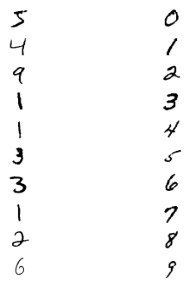

In [3]:
plt.figure(figsize=(5,5))
for k in range(20):
 plt.subplot(10,2,k+1)
 plt.imshow(x_train[k],cmap='Greys')
 plt.axis('off')
plt.show()

In [4]:
x_train[0]
x_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
x_train=x_train.reshape(60000,784).astype('float32')
x_valid=x_valid.reshape(10000,784).astype('float32')

In [6]:
x_train/=255
x_valid/=255
x_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
from keras import utils as np_utils
n_classes=10
y_train=keras.utils.np_utils.to_categorical(y_train,n_classes)
y_valid=keras.utils.np_utils.to_categorical(y_valid,n_classes)
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [8]:
model=Sequential()
model.add(Dense(64,activation='sigmoid',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
from keras.callbacks import History
model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
History=model.fit(x_train,y_train,batch_size=128,epochs=90,verbose=1)

Epoch 1/90
469/469 [==============================] - 3s 3ms/step - loss: 0.0924 - accuracy: 0.0830
Epoch 2/90
469/469 [==============================] - 2s 3ms/step - loss: 0.0912 - accuracy: 0.0711
Epoch 3/90
469/469 [==============================] - 1s 3ms/step - loss: 0.0905 - accuracy: 0.0769
Epoch 4/90
469/469 [==============================] - 2s 3ms/step - loss: 0.0900 - accuracy: 0.1050
Epoch 5/90
469/469 [==============================] - 2s 3ms/step - loss: 0.0897 - accuracy: 0.1736
Epoch 6/90
469/469 [==============================] - 1s 3ms/step - loss: 0.0893 - accuracy: 0.2446
Epoch 7/90
469/469 [==============================] - 1s 3ms/step - loss: 0.0890 - accuracy: 0.2900
Epoch 8/90
469/469 [==============================] - 1s 3ms/step - loss: 0.0887 - accuracy: 0.3146
Epoch 9/90
469/469 [==============================] - 1s 3ms/step - loss: 0.0884 - accuracy: 0.3273
Epoch 10/90
469/469 [==============================] - 2s 5ms/step - loss: 0.0881 - accuracy: 0.3348

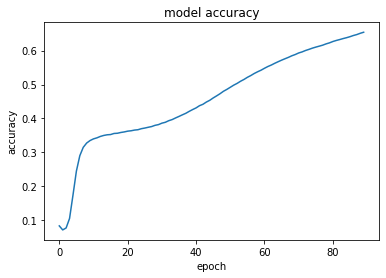

In [10]:
plt.plot(History.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

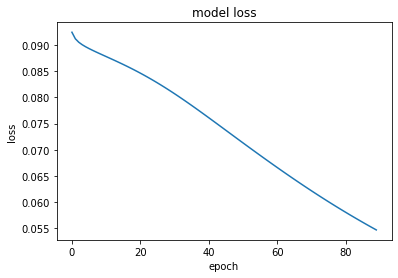

In [11]:
plt.plot(History.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()